In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimpy import skim
import time
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CreditCardFraud/creditcard.csv')
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Remove duplicates

In [ ]:
df.duplicated(keep='first').sum()

1081

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.duplicated().sum()

0

Scaling

In [ ]:
# Values of amount variable varies alot, thus we normalise it
sc = StandardScaler()

amt = df['Amount'].values

df['Amount'] = sc.fit_transform(amt.reshape(-1,1))

df['Amount']

0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
284802   -0.350252
284803   -0.254325
284804   -0.082239
284805   -0.313391
284806    0.513290
Name: Amount, Length: 283726, dtype: float64

In [ ]:
time = df['Time'].values

df['Time'] = sc.fit_transform(time.reshape(-1,1))

df['Time']

0        -1.996823
1        -1.996823
2        -1.996802
3        -1.996802
4        -1.996781
            ...   
284802    1.642235
284803    1.642257
284804    1.642278
284805    1.642278
284806    1.642362
Name: Time, Length: 283726, dtype: float64

Feature Engineering

In [ ]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, 
#the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [ ]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

Explore Data

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0,23
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0,23
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0,23
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0,23
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         283726 non-null  float64
 1   V2         283726 non-null  float64
 2   V3         283726 non-null  float64
 3   V4         283726 non-null  float64
 4   V5         283726 non-null  float64
 5   V6         283726 non-null  float64
 6   V7         283726 non-null  float64
 7   V8         283726 non-null  float64
 8   V9         283726 non-null  float64
 9   V10        283726 non-null  float64
 10  V11        283726 non-null  float64
 11  V12        283726 non-null  float64
 12  V13        283726 non-null  float64
 13  V14        283726 non-null  float64
 14  V15        283726 non-null  float64
 15  V16        283726 non-null  float64
 16  V17        283726 non-null  float64
 17  V18        283726 non-null  float64
 18  V19        283726 non-null  float64
 19  V20        283726 non-n

In [ ]:
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 283726 │ │ float64     │ 29    │                                    │
│ │ Number of columns │ 31     │ │ int64       │ 2     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃        ┃ missin ┃ complet ┃ mean   ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┃        ┃ g      ┃ e rate  ┃        ┃       ┃       ┃        ┃        ┃      ┃        ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ V1     │      0 │       1 │ 0.0059 │   1.9 │   -56 │  -0.92 │    1.3 │  2.5 │      █ │  │
│ │ V2     │      0 │       1 │ -0.004 │   1.6 │   -73 │   -0.6 │    0.8 │   22 │     █  │  │
│ │        │        │         │      1 │       │       │        │        │      │        │  │
│ │ V3     │      0 │       1 │ 0.0016 │   1.5 │   -48 │  -0.89 │      1 │  9.4 │     ▅█ │  │
│ │ V4     │      0 │       1 │ -0.003 │   1.4 │  -5.7 │  -0.85 │   0.74 │   17 │  ▁█▁   │  │
│ │ V5     │      0 │       1 │ 0.0018 │   1.4 │  -110 │  -0.69 │   0.61 │   35 │     █  │  │
│ │ V6     │      0 │       1 │ -0.001 │   1.3 │   -26 │  -0.77 │    0.4 │   73 │    █   │  │
│ │        │        │         │      1 │       │       │        │        │      │        │  │
│ │ V7     │      0 │       1 │ 0.0018 │   1.2 │   -44 │  -0.55 │   0.57 │  120 │    █   │  │
│ │ V8     │      0 │       1 │ -0.000 │   1.2 │   -73 │  -0.21 │   0.33 │   20 │     █  │  │
│ │        │        │         │     85 │       │       │        │        │      │        │  │
│ │ V9     │      0 │       1 │ -0.001 │   1.1 │   -13 │  -0.64 │    0.6 │   16 │    █▁  │  │
│ │        │        │         │      6 │       │       │        │        │      │        │  │
│ │ V10    │      0 │       1 │ -0.001 │   1.1 │   -25 │  -0.54 │   0.45 │   24 │    ▃█  │  │
│ │        │        │         │      4 │       │       │        │        │      │        │  │
│ │ V11    │      0 │       1 │ 0.0002 │     1 │  -4.8 │  -0.76 │   0.74 │   12 │   █▂   │  │
│ │ V12    │      0 │       1 │ -0.000 │  0.99 │   -19 │  -0.41 │   0.62 │  7.8 │    ▁█  │  │
│ │        │        │         │     71 │       │       │        │        │      │        │  │
│ │ V13    │      0 │       1 │ 0.0006 │     1 │  -5.8 │  -0.65 │   0.66 │  7.1 │   ▁█▃  │  │
│ │ V14    │      0 │       1 │ 0.0002 │  0.95 │   -19 │  -0.43 │   0.49 │   11 │    █▂  │  │
│ │        │        │         │      5 │       │       │        │        │      │        │  │
│ │ V15    │      0 │       1 │  0.001 │  0.91 │  -4.5 │  -0.58 │   0.65 │  8.9 │   ▇█   │  │
│ │ V16    │      0 │       1 │ 0.0012 │  0.87 │   -14 │  -0.47 │   0.52 │   17 │    █   │  │
│ │ V17    │      0 │       1 │ 0.0001 │  0.84 │   -25 │  -0.48 │    0.4 │  9.3 │     █  │  │
│ │        │        │         │      7 │       │       │        │        │      │        │  │
│ │ V18    │      0 │       1 │ 0.0015 │  0.84 │  -9.5 │   -0.5 │    0.5 │    5 │    █▅  │  │
│ │ V19    │      0 │       1 │ -0.000 │  0.81 │  -7.2 │  -0.46 │   0.46 │  5.6 │    ▁█  │  │
│ │        │        │         │     26 │       │       │        │        │      │        │  │
│ │ V20    │      0 │       1 │ 0.0001 │  0.77 │   -54 │  -0.21 │   0.13 │   39 │     █  │  │
│ │        │        │         │      9 │       │    

In [ ]:
print(df.isnull().sum())

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount       0
Class        0
Time_Hour    0
dtype: int64


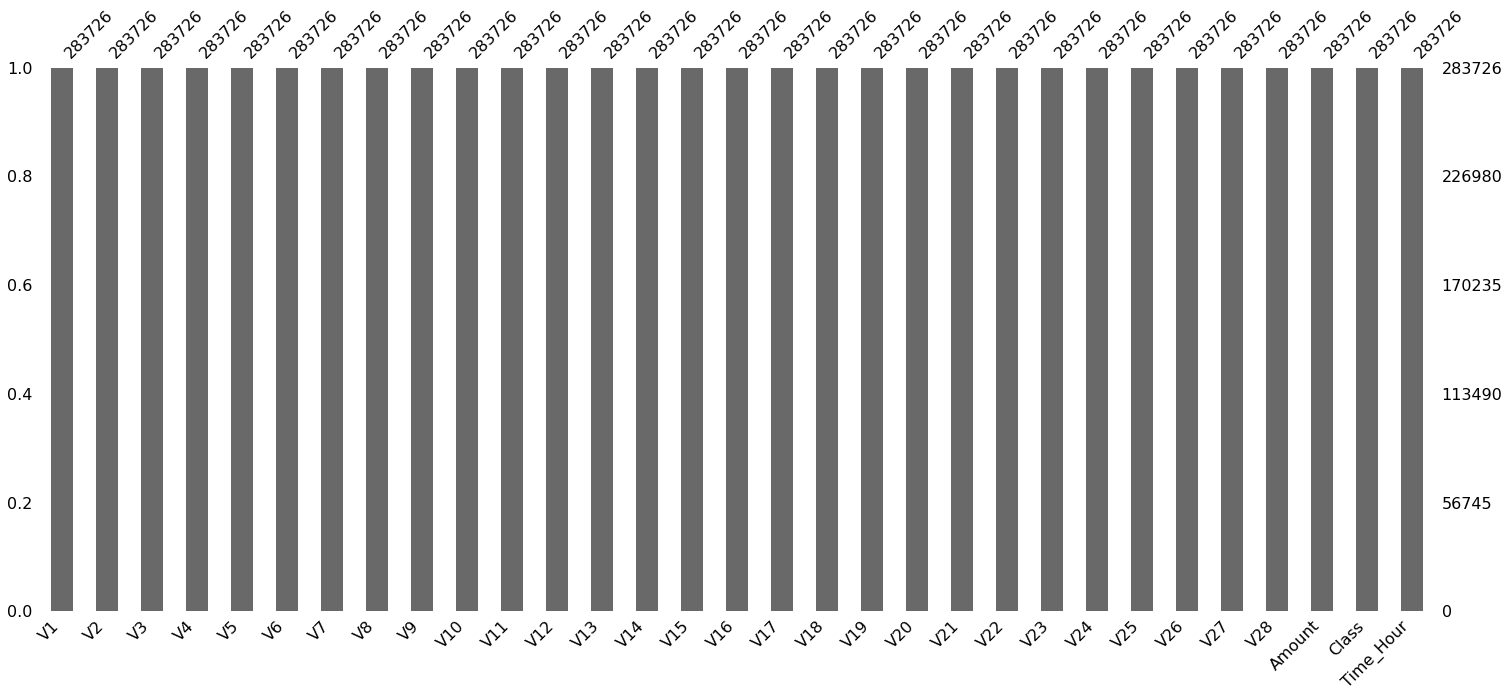

In [ ]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.bar(df)

In [ ]:
nonfraud = df[df.Class==0]
fraud = df[df.Class==1]

print("Amount stats for non fraud class")
print(nonfraud.Amount.describe())

print("\nAmount stats for fraud class")
print(fraud.Amount.describe())

Amount stats for non fraud class
count    283253.000000
mean         -0.000236
std           0.999920
min          -0.353327
25%          -0.330683
50%          -0.265467
75%          -0.043981
max         102.247564
Name: Amount, dtype: float64

Amount stats for fraud class
count    473.000000
mean       0.141371
std        1.039186
min       -0.353327
25%       -0.349333
50%       -0.314109
75%        0.069558
max        8.136603
Name: Amount, dtype: float64


Class
0    99.83329
1     0.16671
Name: Class, dtype: float64


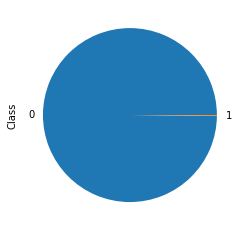

In [ ]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

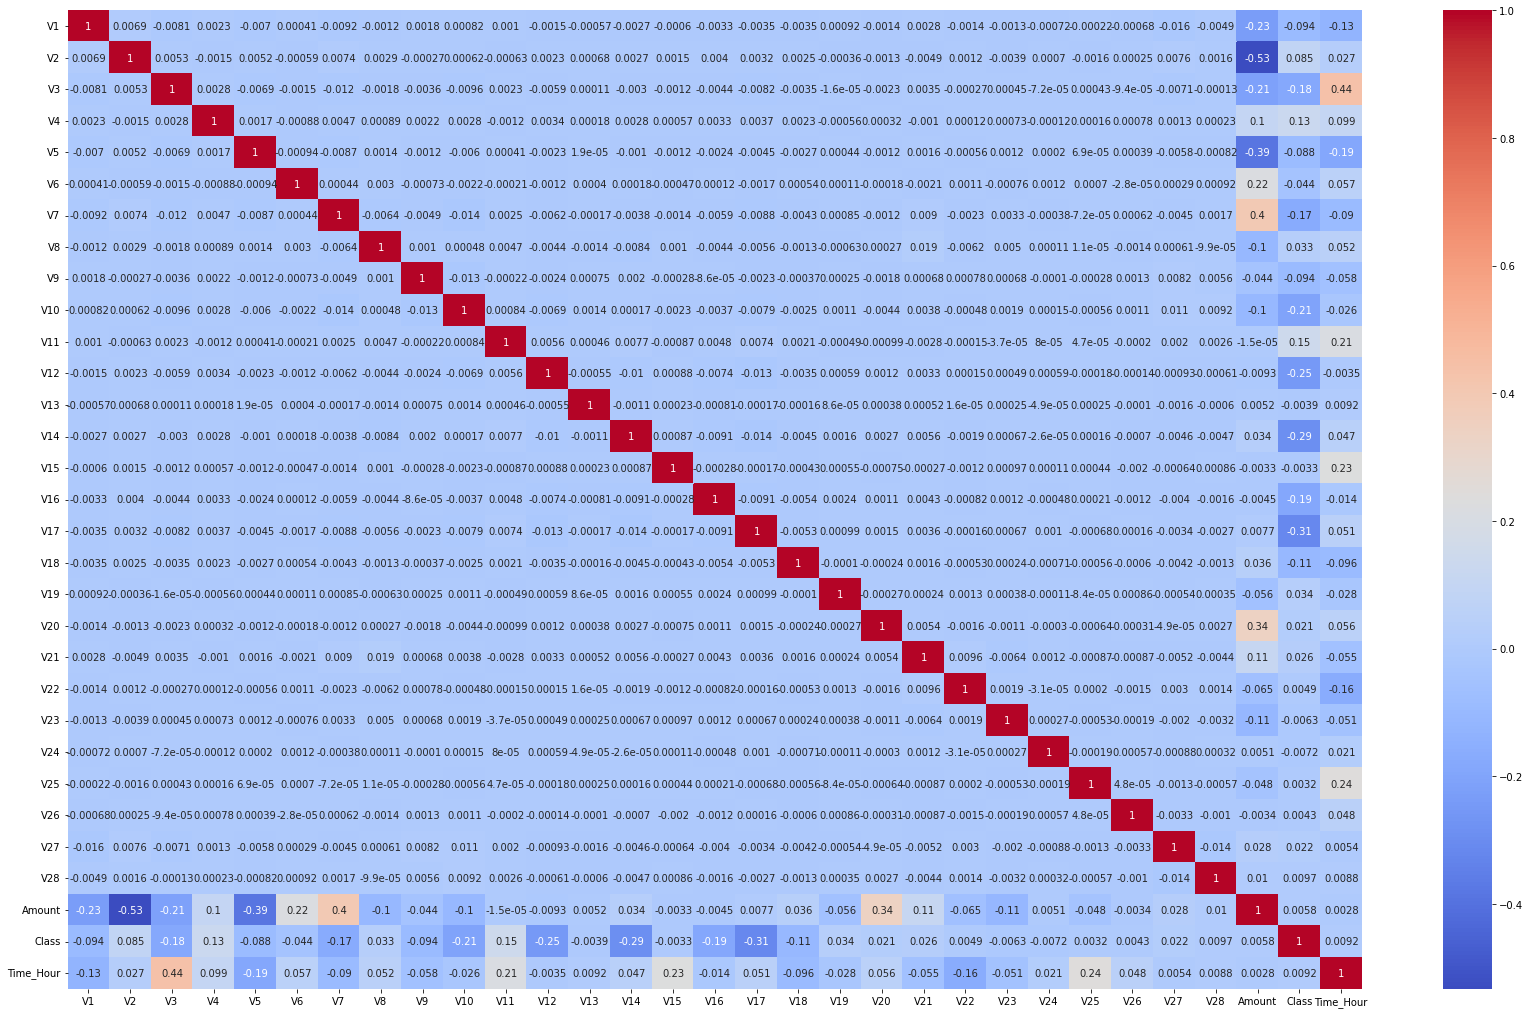

In [ ]:
# Checking the correlation
corr = df.corr()

# Checking the correlation in heatmap
plt.figure(figsize=(29,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

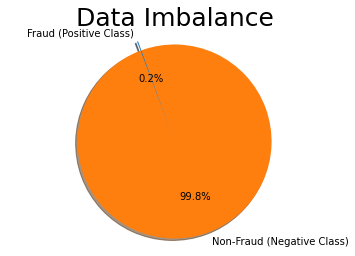

In [ ]:
count1 = 0
count0 = 0

for i in df['Class'].values:
  if i == 1:
    count1 += 1
  else:
    count0 += 1

count1 = (count1/len(df['Class']))*100
count0 = (count0/len(df['Class']))*100

x = ['Fraud (Positive Class)', 'Non-Fraud (Negative Class)']
y = [count1, count0]

explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.title('Data Imbalance', fontsize=25)
plt.show()

Split Data

In [ ]:
# Splitting the dataset into X and y
y= df['Class']
x = df.drop(['Class'], axis=1)

In [ ]:
# Checking some rows of X
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,23
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,23
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,23
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,23
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,23


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.20)

In [ ]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
360
113


Model Building and Training

Logistic Regression

In [ ]:
start = datetime.now()
LR_before = LogisticRegression(random_state=20)
# training
LR_before.fit(x_train, y_train)
# testing
y_pred_LR_before = LR_before.predict(x_test)
print(classification_report(y_test, y_pred_LR_before))

recall_sensitivity = metrics.recall_score(y_test, y_pred_LR_before, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_LR_before, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_LR_before)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.90      0.61      0.73       113

    accuracy                           1.00     56746
   macro avg       0.95      0.81      0.86     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.6106194690265486
Specificity: 0.9998587396041178
Accuracy: 0.9990836358509851
Time:  0:00:09.823724


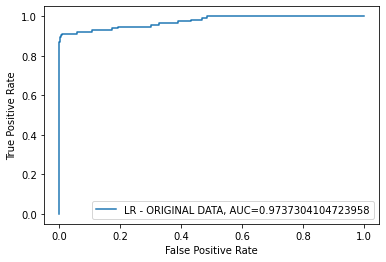

In [ ]:
y_pred_proba_LR_before = LR_before.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_LR_before)
auc = metrics.roc_auc_score(y_test, y_pred_proba_LR_before)
plt.plot(fpr,tpr,label="LR - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

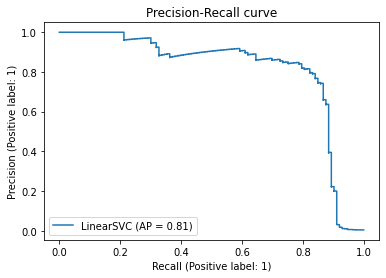

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_LR_before, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

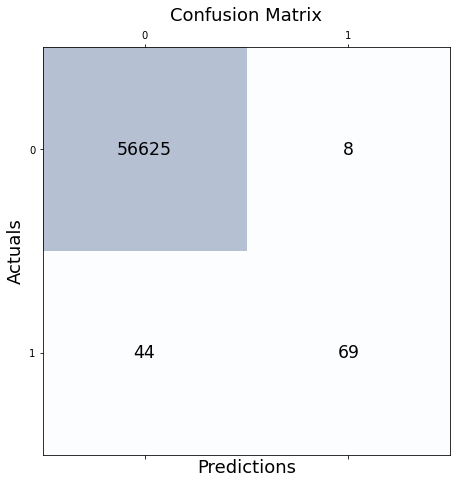

In [ ]:
#Get the confusion matrix
cf_matrix_LR_before = confusion_matrix(y_test, y_pred_LR_before)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_LR_before, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_LR_before.shape[0]):
    for j in range(cf_matrix_LR_before.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_LR_before[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest

In [ ]:
start = datetime.now()
RF_before = RandomForestClassifier(random_state=10)
# training
RF_before.fit(x_train, y_train)
# testing
y_pred_RF_before = RF_before.predict(x_test)
print(classification_report(y_test, y_pred_RF_before))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_before, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_before, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_before)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.92      0.81      0.86       113

    accuracy                           1.00     56746
   macro avg       0.96      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.8141592920353983
Specificity: 0.9998587396041178
Accuracy: 0.9994889507630493
Time:  0:05:09.776888


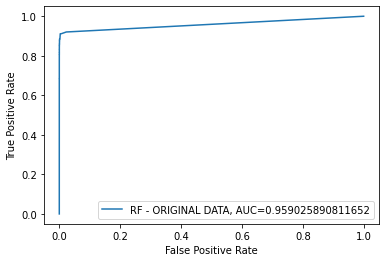

In [ ]:
y_pred_proba_RF_before = RF_before.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_before)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_before)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

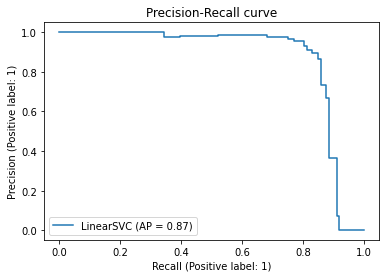

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_before, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

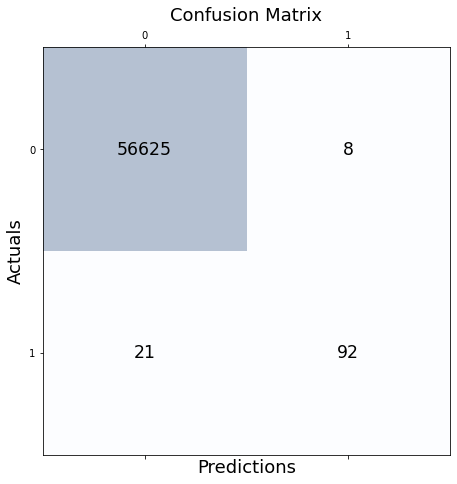

In [ ]:
#Get the confusion matrix
cf_matrix_RF_before = confusion_matrix(y_test, y_pred_RF_before)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_before, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_before.shape[0]):
    for j in range(cf_matrix_RF_before.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_before[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

XGBoost

In [ ]:
start = datetime.now()
XGB_before = XGBClassifier(n_jobs=-1, random_state=30)
# training
XGB_before.fit(x_train, y_train)
# testing
y_pred_XGB_before = XGB_before.predict(x_test)
print(classification_report(y_test, y_pred_XGB_before))

recall_sensitivity = metrics.recall_score(y_test, y_pred_XGB_before, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_XGB_before, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_XGB_before)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.94      0.83      0.88       113

    accuracy                           1.00     56746
   macro avg       0.97      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.831858407079646
Specificity: 0.9998940547030883
Accuracy: 0.9995594403129736
Time:  0:01:11.440938


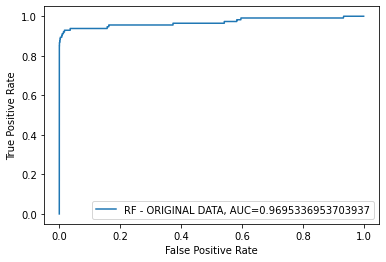

In [ ]:
y_pred_proba_XGB_before = XGB_before.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB_before)
auc = metrics.roc_auc_score(y_test, y_pred_proba_XGB_before)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

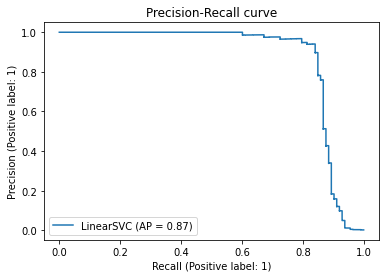

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_XGB_before, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

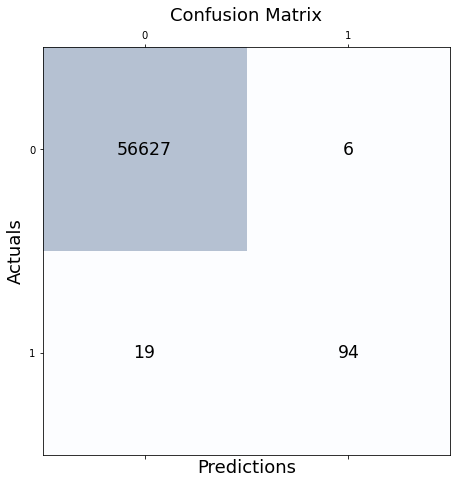

In [ ]:
#Get the confusion matrix
cf_matrix_XGB_before = confusion_matrix(y_test, y_pred_XGB_before)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_XGB_before, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_XGB_before.shape[0]):
    for j in range(cf_matrix_XGB_before.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_XGB_before[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Class Imbalancement

Random Oversampling

In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=10)

In [ ]:
x_over, y_over = oversample.fit_resample(x_train, y_train)
print("RANDOM OVERSAMPLING RESULTS:")
y_over.value_counts()

RANDOM OVERSAMPLING RESULTS:


0    226620
1    226620
Name: Class, dtype: int64

Random Undersampling

In [ ]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=20)

In [ ]:
# fit and apply the transform
x_under, y_under = undersample.fit_resample(x_train, y_train)
print("RANDOM UNDERSAMPLING RESULTS:")
y_under.value_counts()

RANDOM UNDERSAMPLING RESULTS:


0    360
1    360
Name: Class, dtype: int64

SMOTE

In [ ]:
# define SMOTE strategy
SMOTE = SMOTE(random_state=30)

In [ ]:
# fit and apply the transform
x_SMOTE, y_SMOTE = SMOTE.fit_resample(x_train, y_train)
print("SMOTE RESULTS:")
y_SMOTE.value_counts()

SMOTE RESULTS:


0    226620
1    226620
Name: Class, dtype: int64

SVMSMOTE

In [ ]:
SVMSMOTE = SVMSMOTE(random_state=42)

In [ ]:
# fit and apply the transform
x_SVM_SMOTE, y_SVM_SMOTE = SVMSMOTE.fit_resample(x_train, y_train)
print("SVM_SMOTE RESULTS:")
y_SVM_SMOTE.value_counts()

SVM_SMOTE RESULTS:


0    226620
1    226620
Name: Class, dtype: int64

Run Model After Resampling

Logistic Regression with Undersampling

In [ ]:
start = datetime.now()
# training
LR_after_under = LogisticRegression(random_state=10)
LR_after_under.fit(x_under, y_under)
# testing
y_pred_LR_after_under = LR_after_under.predict(x_test)
print(classification_report(y_test, y_pred_LR_after_under))

recall_sensitivity = metrics.recall_score(y_test, y_pred_LR_after_under, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_LR_after_under, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_LR_after_under)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56633
           1       0.05      0.93      0.10       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.54     56746
weighted avg       1.00      0.97      0.98     56746

Sensitivity: 0.9292035398230089
Specificity: 0.9653382303603906
Accuracy: 0.9652662742748388
Time:  0:00:00.424421


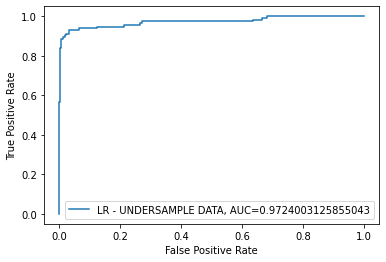

In [ ]:
y_pred_proba_LR_after_under = LR_after_under.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_LR_after_under)
auc = metrics.roc_auc_score(y_test, y_pred_proba_LR_after_under)
plt.plot(fpr,tpr,label="LR - UNDERSAMPLE DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

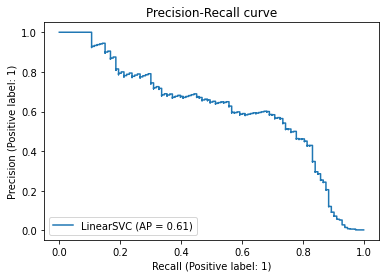

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_LR_after_under, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

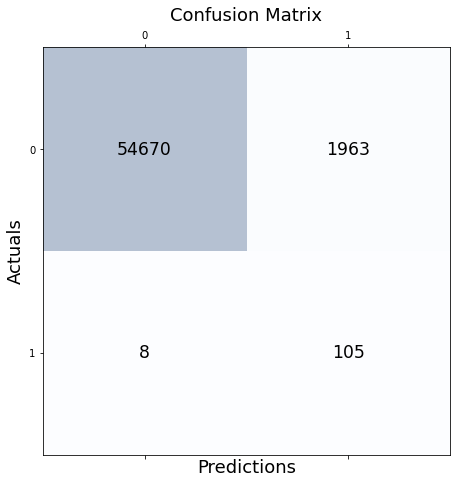

In [ ]:
#Get the confusion matrix
cf_matrix_LR_after_under = confusion_matrix(y_test, y_pred_LR_after_under)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_LR_after_under, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_LR_after_under.shape[0]):
    for j in range(cf_matrix_LR_after_under.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_LR_after_under[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Logistic Regression with Oversampling

In [ ]:
start = datetime.now()
# training
LR_after_over = LogisticRegression(random_state=40)
LR_after_over.fit(x_over, y_over)
# testing
y_pred_LR_after_over = LR_after_over.predict(x_test)
print(classification_report(y_test, y_pred_LR_after_over))

recall_sensitivity = metrics.recall_score(y_test, y_pred_LR_after_over, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_LR_after_over, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_LR_after_over)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56633
           1       0.06      0.93      0.12       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746

Sensitivity: 0.9292035398230089
Specificity: 0.9729486341885473
Accuracy: 0.9728615232791739
Time:  0:00:12.408829


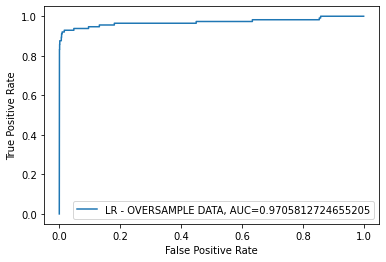

In [ ]:
y_pred_proba_LR_after_over = LR_after_over.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_LR_after_over)
auc = metrics.roc_auc_score(y_test, y_pred_proba_LR_after_over)
plt.plot(fpr,tpr,label="LR - OVERSAMPLE DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

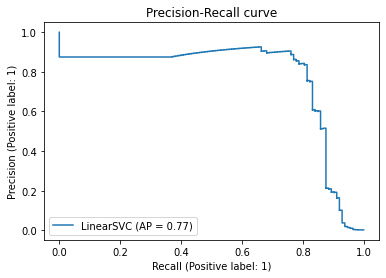

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_LR_after_over, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

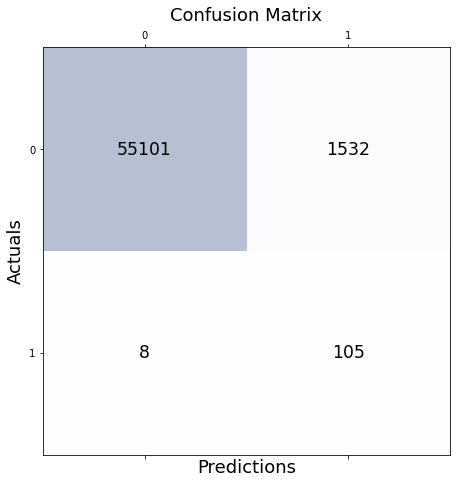

In [ ]:
#Get the confusion matrix
cf_matrix_LR_after_over = confusion_matrix(y_test, y_pred_LR_after_over)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_LR_after_over, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_LR_after_over.shape[0]):
    for j in range(cf_matrix_LR_after_over.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_LR_after_over[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Logistic Regression with SMOTE

In [ ]:
start = datetime.now()
# training
LR_after_SMOTE = LogisticRegression(random_state=30)
LR_after_SMOTE.fit(x_SMOTE, y_SMOTE)
# testing
y_pred_LR_after_SMOTE = LR_after_SMOTE.predict(x_test)
print(classification_report(y_test, y_pred_LR_after_SMOTE))

recall_sensitivity = metrics.recall_score(y_test, y_pred_LR_after_SMOTE, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_LR_after_SMOTE, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_LR_after_SMOTE)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56633
           1       0.06      0.93      0.10       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.54     56746
weighted avg       1.00      0.97      0.98     56746

Sensitivity: 0.9292035398230089
Specificity: 0.9684106439708298
Accuracy: 0.9683325696965425
Time:  0:00:12.277417


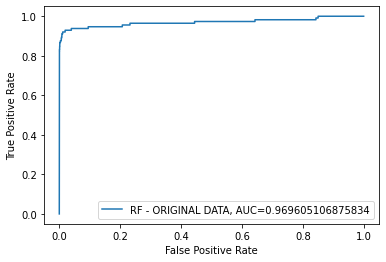

In [ ]:
y_pred_proba_LR_after_SMOTE = LR_after_SMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_LR_after_SMOTE)
auc = metrics.roc_auc_score(y_test, y_pred_proba_LR_after_SMOTE)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

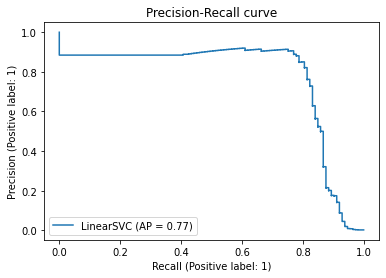

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_LR_after_SMOTE, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

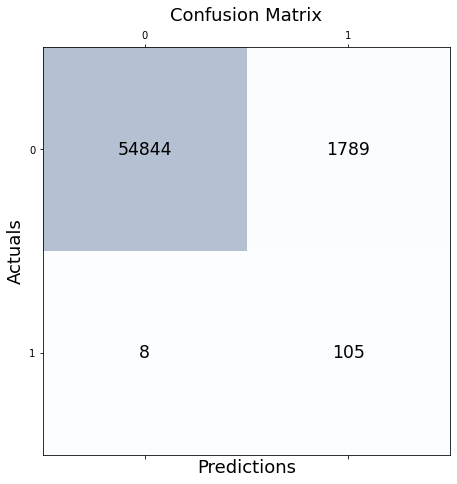

In [ ]:
#Get the confusion matrix
cf_matrix_LR_after_SMOTE = confusion_matrix(y_test, y_pred_LR_after_SMOTE)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_LR_after_SMOTE, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_LR_after_SMOTE.shape[0]):
    for j in range(cf_matrix_LR_after_SMOTE.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_LR_after_SMOTE[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Logistic Regression with SVMSMOTE

In [ ]:
start = datetime.now()
# training
LR_after_SVMSMOTE = LogisticRegression(random_state=20)
LR_after_SVMSMOTE.fit(x_SVM_SMOTE, y_SVM_SMOTE)
# testing
y_pred_LR_after_SVMSMOTE = LR_after_SVMSMOTE.predict(x_test)
print(classification_report(y_test, y_pred_LR_after_SVMSMOTE))

recall_sensitivity = metrics.recall_score(y_test, y_pred_LR_after_SVMSMOTE, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_LR_after_SVMSMOTE, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_LR_after_SVMSMOTE)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56633
           1       0.16      0.89      0.27       113

    accuracy                           0.99     56746
   macro avg       0.58      0.94      0.63     56746
weighted avg       1.00      0.99      0.99     56746

Sensitivity: 0.8938053097345132
Specificity: 0.990747444069712
Accuracy: 0.9905544003101541
Time:  0:00:10.661296


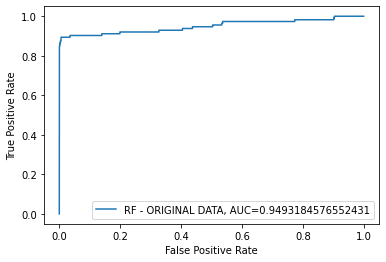

In [ ]:
y_pred_proba_LR_after_SVMSMOTE = LR_after_SVMSMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_LR_after_SVMSMOTE)
auc = metrics.roc_auc_score(y_test, y_pred_proba_LR_after_SVMSMOTE)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

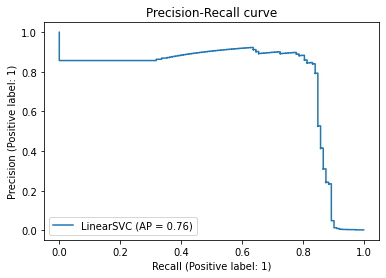

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_LR_after_SVMSMOTE, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

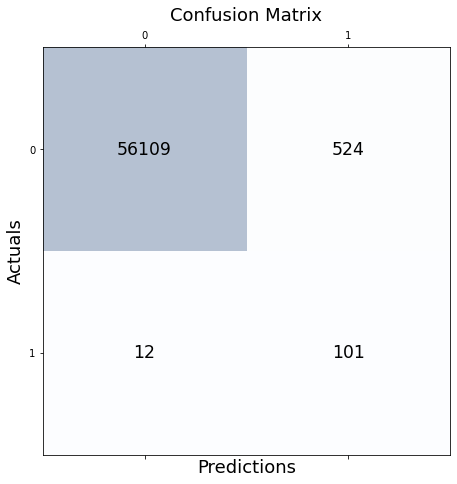

In [ ]:
#Get the confusion matrix
cf_matrix_LR_after_SVMSMOTE = confusion_matrix(y_test, y_pred_LR_after_SVMSMOTE)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_LR_after_SVMSMOTE, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_LR_after_SVMSMOTE.shape[0]):
    for j in range(cf_matrix_LR_after_SVMSMOTE.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_LR_after_SVMSMOTE[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest with Undersampling

In [ ]:
start = datetime.now()
# training
RF_after_under = RandomForestClassifier(n_jobs=-1,random_state=30)
RF_after_under.fit(x_under, y_under)
# testing
y_pred_RF_after_under = RF_after_under.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_under))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_under, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_under, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_under)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56633
           1       0.06      0.91      0.12       113

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.97      0.98     56746

Sensitivity: 0.911504424778761
Specificity: 0.972736743594724
Accuracy: 0.972614809854439
Time:  0:00:02.874474


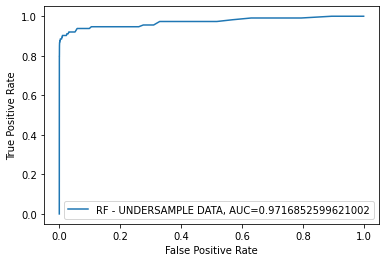

In [ ]:
y_pred_proba_RF_after_under = RF_after_under.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_under)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_under)
plt.plot(fpr,tpr,label="RF - UNDERSAMPLE DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

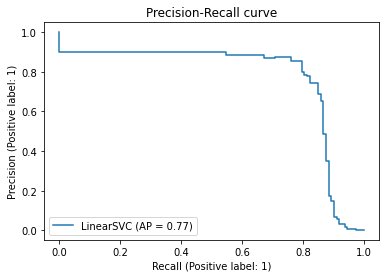

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_under, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

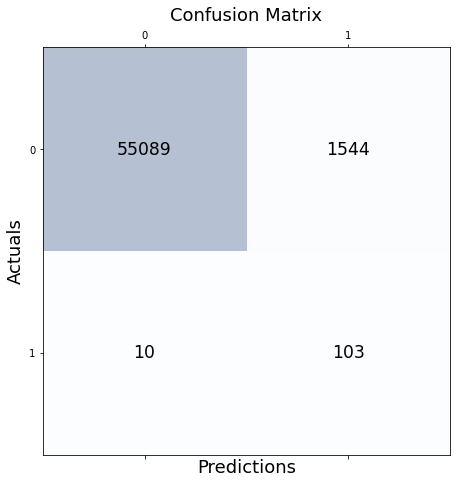

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_under = confusion_matrix(y_test, y_pred_RF_after_under)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_under, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_under.shape[0]):
    for j in range(cf_matrix_RF_after_under.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_under[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest with Oversampling

In [ ]:
start = datetime.now()
# training
RF_after_over = RandomForestClassifier(n_jobs=-1,random_state=40)
RF_after_over.fit(x_over, y_over)
# testing
y_pred_RF_after_over = RF_after_over.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_over))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_over, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_over, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_over)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.96      0.80      0.87       113

    accuracy                           1.00     56746
   macro avg       0.98      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.7964601769911505
Specificity: 0.9999293698020588
Accuracy: 0.9995241955380115
Time:  0:03:03.987514


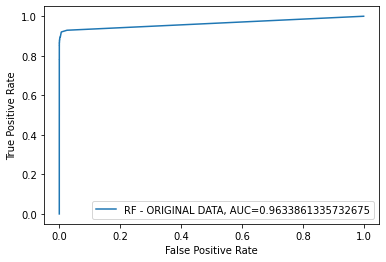

In [ ]:
y_pred_proba_RF_after_over = RF_after_over.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_over)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_over)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

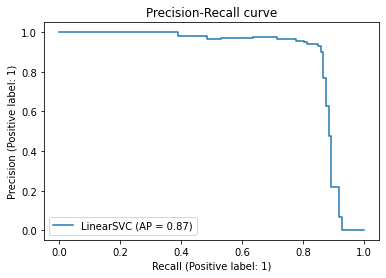

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_over, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

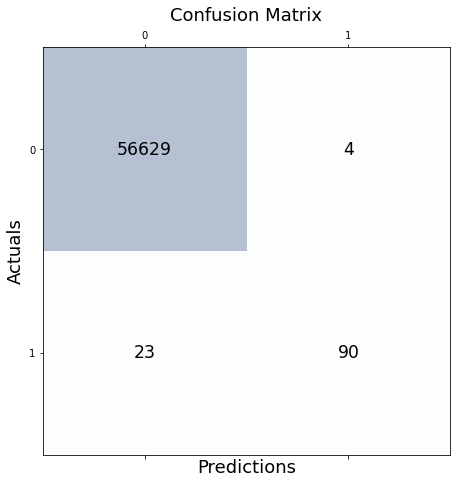

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_over = confusion_matrix(y_test, y_pred_RF_after_over)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_over, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_over.shape[0]):
    for j in range(cf_matrix_RF_after_over.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_over[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest with SMOTE

In [ ]:
start = datetime.now()
# training
RF_after_SMOTE = RandomForestClassifier(n_jobs=-1,random_state=50)
RF_after_SMOTE.fit(x_SMOTE, y_SMOTE)
# testing
y_pred_RF_after_SMOTE = RF_after_SMOTE.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_SMOTE))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_SMOTE, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_SMOTE, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_SMOTE)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.88      0.85      0.86       113

    accuracy                           1.00     56746
   macro avg       0.94      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.8495575221238938
Specificity: 0.9997704518566913
Accuracy: 0.9994713283755683
Time:  0:05:52.734760


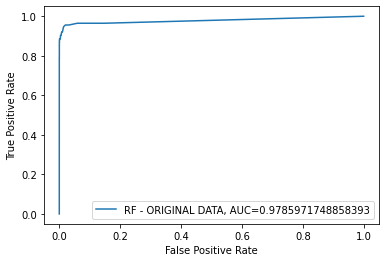

In [ ]:
y_pred_proba_RF_after_SMOTE = RF_after_SMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_SMOTE)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_SMOTE)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

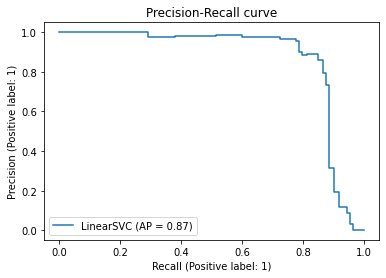

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_SMOTE, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

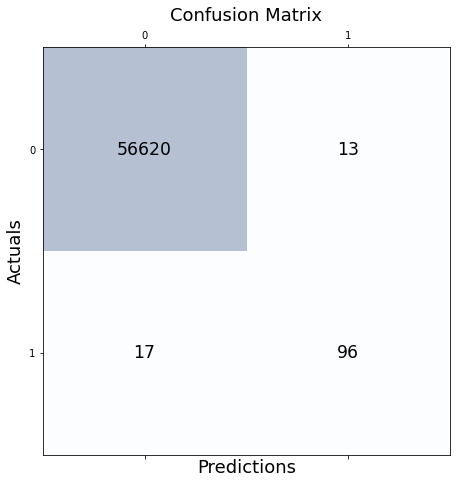

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_SMOTE = confusion_matrix(y_test, y_pred_RF_after_SMOTE)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_SMOTE, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_SMOTE.shape[0]):
    for j in range(cf_matrix_RF_after_SMOTE.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_SMOTE[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest with SVMSMOTE

In [ ]:
start = datetime.now()
# training
RF_after_SVMSMOTE = RandomForestClassifier(n_jobs=-1,random_state=60)
RF_after_SVMSMOTE.fit(x_SVM_SMOTE, y_SVM_SMOTE)
# testing
y_pred_RF_after_SVMSMOTE = RF_after_SVMSMOTE.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_SVMSMOTE))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_SVMSMOTE, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_SVMSMOTE, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_SVMSMOTE)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.86      0.85      0.86       113

    accuracy                           1.00     56746
   macro avg       0.93      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.8495575221238938
Specificity: 0.9997351367577207
Accuracy: 0.9994360836006062
Time:  0:05:30.499460


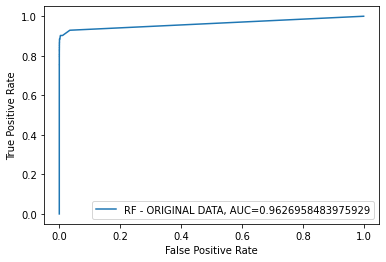

In [ ]:
y_pred_proba_RF_after_SVMSMOTE = RF_after_SVMSMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_SVMSMOTE)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_SVMSMOTE)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

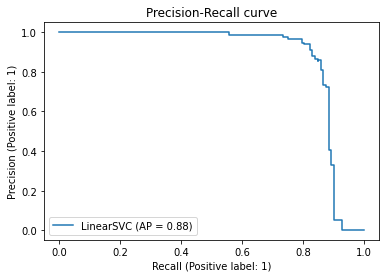

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_SVMSMOTE, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

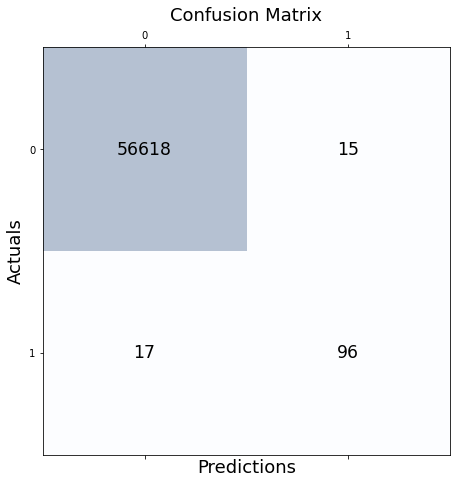

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_SVMSMOTE = confusion_matrix(y_test, y_pred_RF_after_SVMSMOTE)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_SVMSMOTE, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_SVMSMOTE.shape[0]):
    for j in range(cf_matrix_RF_after_SVMSMOTE.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_SVMSMOTE[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

XGBoost with Random Undersampling

In [ ]:
start = datetime.now()
# training
XGB_after_under = XGBClassifier(n_jobs=-1,random_state=70)
XGB_after_under.fit(x_under, y_under)
# testing
y_pred_XGB_after_under = XGB_after_under.predict(x_test)
print(classification_report(y_test, y_pred_XGB_after_under))

recall_sensitivity = metrics.recall_score(y_test, y_pred_XGB_after_under, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_XGB_after_under, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_XGB_after_under)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56633
           1       0.06      0.92      0.10       113

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746

Sensitivity: 0.9203539823008849
Specificity: 0.9686225345646531
Accuracy: 0.9685264159588342
Time:  0:00:01.074098


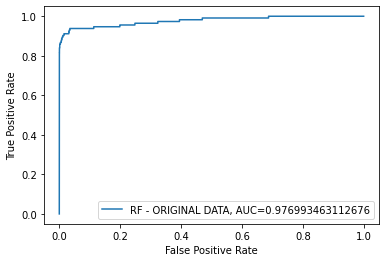

In [ ]:
y_pred_proba_XGB_after_under = XGB_after_under.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB_after_under)
auc = metrics.roc_auc_score(y_test, y_pred_proba_XGB_after_under)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

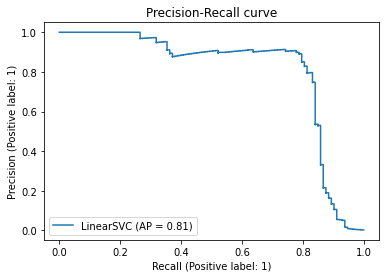

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_XGB_after_under, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

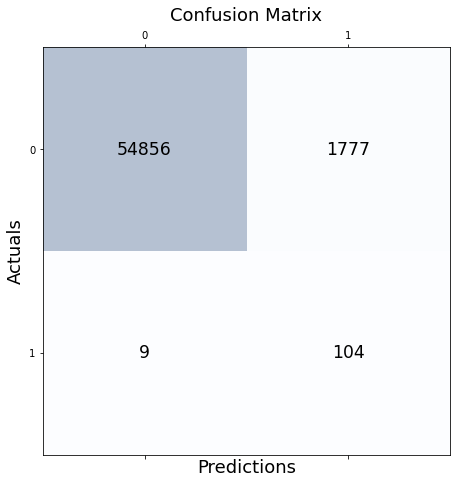

In [ ]:
#Get the confusion matrix
cf_matrix_XGB_after_under = confusion_matrix(y_test, y_pred_XGB_after_under)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_XGB_after_under, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_XGB_after_under.shape[0]):
    for j in range(cf_matrix_XGB_after_under.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_XGB_after_under[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

XGBoost with Random Oversampling

In [ ]:
start = datetime.now()
# training
XGB_after_over = XGBClassifier(n_jobs=-1, random_state=80)
XGB_after_over.fit(x_over, y_over)
# testing
y_pred_XGB_after_over = XGB_after_over.predict(x_test)
print(classification_report(y_test, y_pred_XGB_after_over))

recall_sensitivity = metrics.recall_score(y_test, y_pred_XGB_after_over, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_XGB_after_over, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_XGB_after_over)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56633
           1       0.21      0.91      0.34       113

    accuracy                           0.99     56746
   macro avg       0.60      0.95      0.67     56746
weighted avg       1.00      0.99      1.00     56746

Sensitivity: 0.911504424778761
Specificity: 0.9930252679533135
Accuracy: 0.9928629330701724
Time:  0:01:45.521194


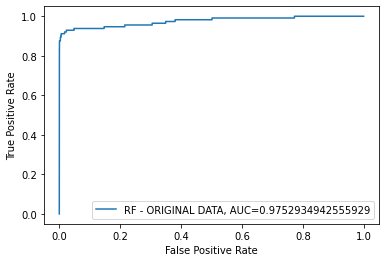

In [ ]:
y_pred_proba_XGB_after_over = XGB_after_over.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB_after_over)
auc = metrics.roc_auc_score(y_test, y_pred_proba_XGB_after_over)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

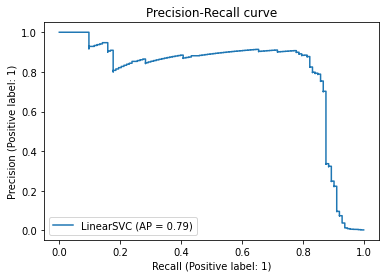

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_XGB_after_over, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

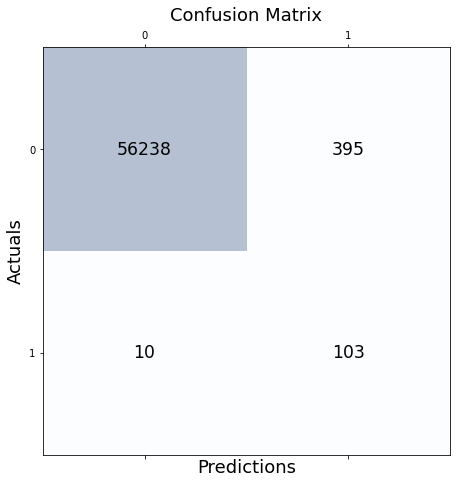

In [ ]:
#Get the confusion matrix
cf_matrix_XGB_after_over = confusion_matrix(y_test, y_pred_XGB_after_over)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_XGB_after_over, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_XGB_after_over.shape[0]):
    for j in range(cf_matrix_XGB_after_over.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_XGB_after_over[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

XGBoost with SMOTE

In [ ]:
start = datetime.now()
# training
XGB_after_SMOTE = XGBClassifier(n_jobs=-1,random_state=90)
XGB_after_SMOTE.fit(x_SMOTE, y_SMOTE)
# testing
y_pred_XGB_after_SMOTE = XGB_after_SMOTE.predict(x_test)
print(classification_report(y_test, y_pred_XGB_after_SMOTE))

recall_sensitivity = metrics.recall_score(y_test, y_pred_XGB_after_SMOTE, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_XGB_after_SMOTE, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_XGB_after_SMOTE)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56633
           1       0.11      0.92      0.20       113

    accuracy                           0.98     56746
   macro avg       0.55      0.95      0.59     56746
weighted avg       1.00      0.98      0.99     56746

Sensitivity: 0.9203539823008849
Specificity: 0.9850087404869952
Accuracy: 0.984879991541254
Time:  0:02:17.834347


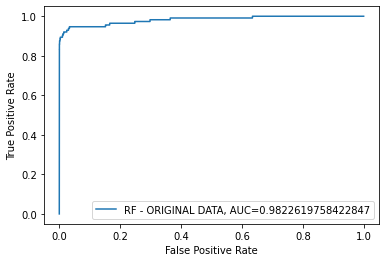

In [ ]:
y_pred_proba_XGB_after_SMOTE = XGB_after_SMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB_after_SMOTE)
auc = metrics.roc_auc_score(y_test, y_pred_proba_XGB_after_SMOTE)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

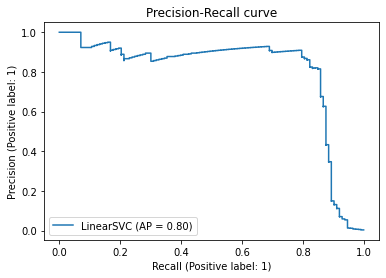

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_XGB_after_SMOTE, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

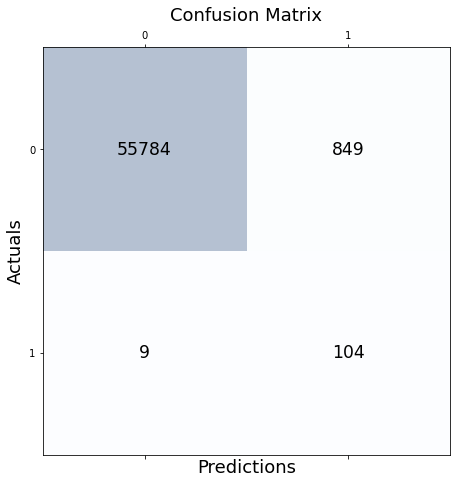

In [ ]:
#Get the confusion matrix
cf_matrix_XGB_after_SMOTE = confusion_matrix(y_test, y_pred_XGB_after_SMOTE)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_XGB_after_SMOTE, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_XGB_after_SMOTE.shape[0]):
    for j in range(cf_matrix_XGB_after_SMOTE.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_XGB_after_SMOTE[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

XGBoost with SVMSMOTE

In [ ]:
start = datetime.now()
# training
XGB_after_SVMSMOTE = XGBClassifier(n_jobs=-1, random_state=15) 
XGB_after_SVMSMOTE.fit(x_SVM_SMOTE, y_SVM_SMOTE)
# testing
y_pred_XGB_after_SVMSMOTE = XGB_after_SVMSMOTE.predict(x_test)
print(classification_report(y_test, y_pred_XGB_after_SVMSMOTE))

recall_sensitivity = metrics.recall_score(y_test, y_pred_XGB_after_SVMSMOTE, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_XGB_after_SVMSMOTE, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_XGB_after_SVMSMOTE)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.40      0.88      0.55       113

    accuracy                           1.00     56746
   macro avg       0.70      0.94      0.78     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.8849557522123894
Specificity: 0.9973690251266929
Accuracy: 0.997145173228069
Time:  0:02:28.119019


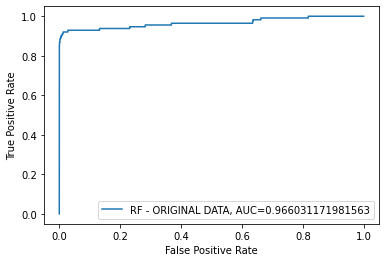

In [ ]:
y_pred_proba_XGB_after_SVMSMOTE = XGB_after_SVMSMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB_after_SVMSMOTE)
auc = metrics.roc_auc_score(y_test, y_pred_proba_XGB_after_SVMSMOTE)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

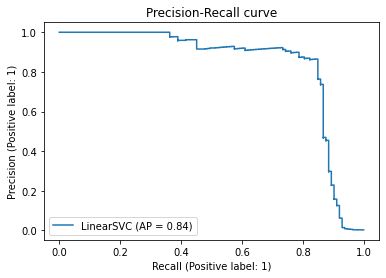

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_XGB_after_SVMSMOTE, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

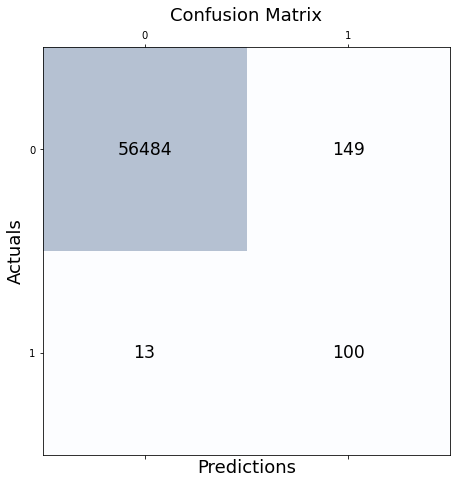

In [ ]:
#Get the confusion matrix
cf_matrix_XGB_after_SVMSMOTE = confusion_matrix(y_test, y_pred_XGB_after_SVMSMOTE)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_XGB_after_SVMSMOTE, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_XGB_after_SVMSMOTE.shape[0]):
    for j in range(cf_matrix_XGB_after_SVMSMOTE.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_XGB_after_SVMSMOTE[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Fine Tuning

In [ ]:
print('Parameters currently in use:\n')
print(RF_after_over.get_params())

In [ ]:
estimator = RandomForestClassifier(n_jobs=-1, random_state=35)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = estimator,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(x,y)

In [ ]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
print (f'Train Accuracy - : {rf_random.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_random.score(x_test,y_test):.3f}')

Random Forest with Random Oversampling after tuning

In [ ]:
start = datetime.now()
# training
RF_after_over_tune = RandomForestClassifier(n_jobs=-1,n_estimators=16, min_samples_split=10,min_samples_leaf=3,max_features='auto',max_depth=60,bootstrap=False)
RF_after_over_tune.fit(x_over, y_over)
# testing
y_pred_RF_after_over_tune = RF_after_over_tune.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_over_tune))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_over_tune, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_over_tune, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_over_tune)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.94      0.80      0.86       113

    accuracy                           1.00     56746
   macro avg       0.97      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.7964601769911505
Specificity: 0.9998940547030883
Accuracy: 0.9994889507630493
Time:  0:01:01.835388


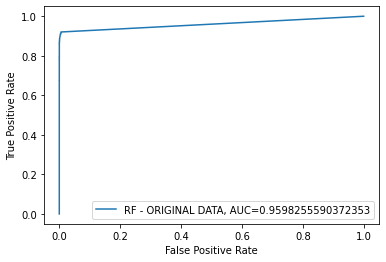

In [ ]:
y_pred_proba_RF_after_over_tune = RF_after_over_tune.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_over_tune)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_over_tune)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

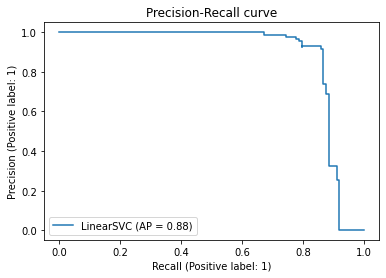

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_over_tune, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

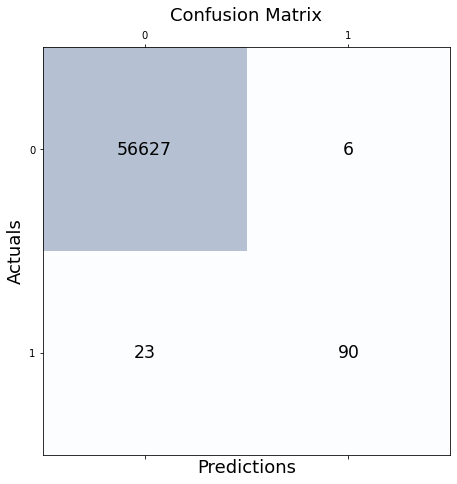

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_over_tune = confusion_matrix(y_test, y_pred_RF_after_over_tune)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_over_tune, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_over_tune.shape[0]):
    for j in range(cf_matrix_RF_after_over_tune.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_over_tune[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest with SMOTE after tuning

In [ ]:
start = datetime.now()
# training
RF_after_SMOTE_tune = RandomForestClassifier(n_jobs=-1,n_estimators=16, min_samples_split=10,min_samples_leaf=3,max_features='auto',max_depth=60,bootstrap=False,criterion='gini')
#RF_after_SMOTE_tune = RandomForestClassifier(n_jobs=-1,n_estimators=72, min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=4,bootstrap=True, criterion='gini')

RF_after_SMOTE_tune.fit(x_SMOTE, y_SMOTE)
# testing
y_pred_RF_after_SMOTE_tune = RF_after_SMOTE_tune.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_SMOTE_tune))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_SMOTE_tune, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_SMOTE_tune, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_SMOTE_tune)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.89      0.84      0.86       113

    accuracy                           1.00     56746
   macro avg       0.94      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.8407079646017699
Specificity: 0.9997881094061766
Accuracy: 0.9994713283755683
Time:  0:01:53.448482


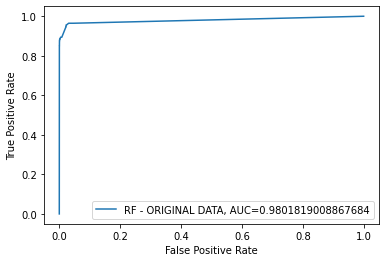

In [ ]:
y_pred_proba_RF_after_SMOTE_tune = RF_after_SMOTE_tune.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_SMOTE_tune)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_SMOTE_tune)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

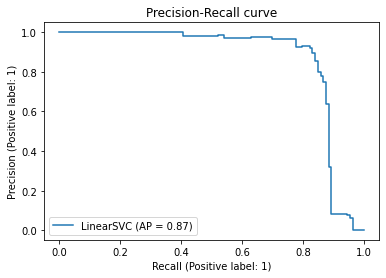

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_SMOTE_tune, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

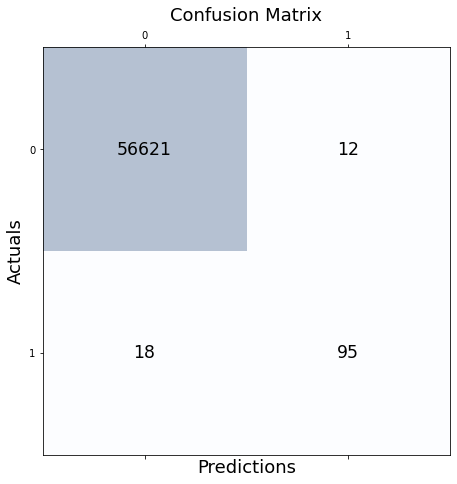

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_SMOTE_tune = confusion_matrix(y_test, y_pred_RF_after_SMOTE_tune)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_SMOTE_tune, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_SMOTE_tune.shape[0]):
    for j in range(cf_matrix_RF_after_SMOTE_tune.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_SMOTE_tune[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Random Forest with SVMSMOTE after tuning

In [ ]:
start = datetime.now()
# training
RF_after_SVMSMOTE_tune = RandomForestClassifier(n_jobs=-1,n_estimators=16, min_samples_split=10,min_samples_leaf=3,max_features='auto',max_depth=60,bootstrap=False,criterion='gini')
RF_after_SVMSMOTE_tune.fit(x_SVM_SMOTE, y_SVM_SMOTE)
# testing
y_pred_RF_after_SVMSMOTE_tune = RF_after_SVMSMOTE_tune.predict(x_test)
print(classification_report(y_test, y_pred_RF_after_SVMSMOTE_tune))

recall_sensitivity = metrics.recall_score(y_test, y_pred_RF_after_SVMSMOTE_tune, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred_RF_after_SVMSMOTE_tune, pos_label=0)
print('Sensitivity:',recall_sensitivity) 
print('Specificity:',recall_specificity)

accuracy = metrics.accuracy_score(y_test, y_pred_RF_after_SVMSMOTE_tune)
print('Accuracy:',accuracy)

end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.86      0.83      0.85       113

    accuracy                           1.00     56746
   macro avg       0.93      0.92      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Sensitivity: 0.831858407079646
Specificity: 0.9997351367577207
Accuracy: 0.9994008388256441
Time:  0:01:26.917580


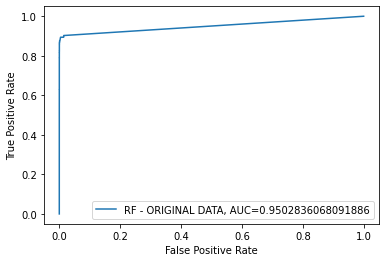

In [ ]:
y_pred_proba_RF_after_SVMSMOTE_tune = RF_after_SVMSMOTE_tune.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_RF_after_SVMSMOTE_tune)
auc = metrics.roc_auc_score(y_test, y_pred_proba_RF_after_SVMSMOTE_tune)
plt.plot(fpr,tpr,label="RF - ORIGINAL DATA, AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

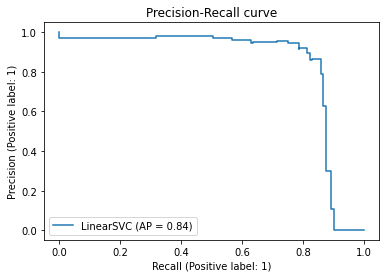

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF_after_SVMSMOTE_tune, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

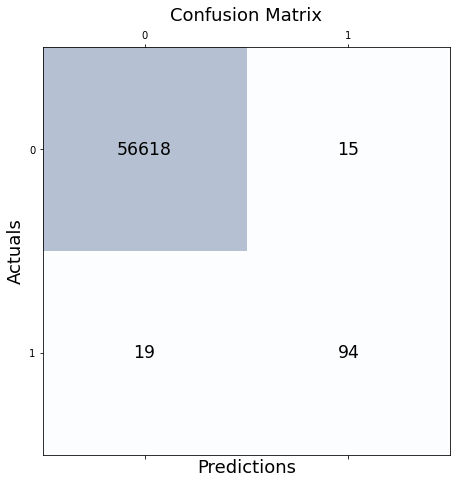

In [ ]:
#Get the confusion matrix
cf_matrix_RF_after_SVMSMOTE_tune = confusion_matrix(y_test, y_pred_RF_after_SVMSMOTE_tune)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cf_matrix_RF_after_SVMSMOTE_tune, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix_RF_after_SVMSMOTE_tune.shape[0]):
    for j in range(cf_matrix_RF_after_SVMSMOTE_tune.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix_RF_after_SVMSMOTE_tune[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert --to html New_Credit_Card_Fraud_Final-4.ipynb

[NbConvertApp] Converting notebook New_Credit_Card_Fraud_Final-4.ipynb to html
[NbConvertApp] Writing 1890092 bytes to New_Credit_Card_Fraud_Final-4.html
